In [10]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import STOPWORDS, WordCloud
import nltk

In [11]:
# nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [12]:
all_data = pd.read_csv('./csv/riss_bigdata.csv', encoding='utf-8')
all_title = all_data['제목']
all_title

0     Big Data in Healthcare: Opportunities and Chal...
1     Combining Human Computing and Machine Learning...
2                          Big data (lost) in the cloud
3     Big Earth data: A new frontier in Earth and in...
4     Common Big Data Challenges and How to Overcome...
                            ...                        
95    Big-BOE: Fusing Spanish Official Gazette with ...
96    Resting-State fMRI Functional Connectivity: Bi...
97    A reference architecture for big data solution...
98    Thermal-Aware and DVFS-Enabled Big Data Task S...
99    Call for Papers: Special Issue on Big Data in ...
Name: 제목, Length: 100, dtype: object

In [28]:
stopWords = set(stopwords.words('english'))
lemma = WordNetLemmatizer()
words = []

for title in all_title:
    EnWords = re.sub(r'[^A-Za-z]',' ', str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

In [29]:
words

[['big', 'data', 'healthcare', 'opportunity', 'challenge'],
 ['combining',
  'human',
  'computing',
  'machine',
  'learning',
  'make',
  'sense',
  'big',
  'aerial',
  'data',
  'disaster',
  'response'],
 ['big', 'data', 'lost', 'cloud'],
 ['big',
  'earth',
  'data',
  'new',
  'frontier',
  'earth',
  'information',
  'science'],
 ['common', 'big', 'data', 'challenge', 'overcome'],
 ['stgi',
  'spatio',
  'temporal',
  'grid',
  'index',
  'model',
  'marine',
  'big',
  'data'],
 ['tv', 'audience', 'measurement', 'big', 'data'],
 ['u',
  'army',
  'person',
  'event',
  'data',
  'environment',
  'military',
  'civilian',
  'big',
  'data',
  'enterprise'],
 ['medical',
  'school',
  'training',
  'relate',
  'practice',
  'evidence',
  'big',
  'data'],
 ['exercise',
  'exploring',
  'big',
  'data',
  'producing',
  'reliable',
  'statistical',
  'information'],
 ['gsio',
  'programmatic',
  'interface',
  'delivering',
  'big',
  'earth',
  'data',
  'service'],
 ['semantics

In [31]:
from functools import reduce

words2 = list(reduce(lambda x, y : x+y, words))

In [32]:
words2

['big',
 'data',
 'healthcare',
 'opportunity',
 'challenge',
 'combining',
 'human',
 'computing',
 'machine',
 'learning',
 'make',
 'sense',
 'big',
 'aerial',
 'data',
 'disaster',
 'response',
 'big',
 'data',
 'lost',
 'cloud',
 'big',
 'earth',
 'data',
 'new',
 'frontier',
 'earth',
 'information',
 'science',
 'common',
 'big',
 'data',
 'challenge',
 'overcome',
 'stgi',
 'spatio',
 'temporal',
 'grid',
 'index',
 'model',
 'marine',
 'big',
 'data',
 'tv',
 'audience',
 'measurement',
 'big',
 'data',
 'u',
 'army',
 'person',
 'event',
 'data',
 'environment',
 'military',
 'civilian',
 'big',
 'data',
 'enterprise',
 'medical',
 'school',
 'training',
 'relate',
 'practice',
 'evidence',
 'big',
 'data',
 'exercise',
 'exploring',
 'big',
 'data',
 'producing',
 'reliable',
 'statistical',
 'information',
 'gsio',
 'programmatic',
 'interface',
 'delivering',
 'big',
 'earth',
 'data',
 'service',
 'semantics',
 'way',
 'semantic',
 'web',
 'open',
 'science',
 'big',
 'ea

In [56]:
from collections import Counter

count = Counter(words2)

word_count = dict()

for tag, counts in count.most_common(50):
    if( len(str(tag))> 1):
        word_count[tag] = counts

word_count

{'data': 116,
 'big': 104,
 'earth': 18,
 'analytics': 16,
 'based': 9,
 'analysis': 8,
 'issue': 7,
 'challenge': 6,
 'science': 6,
 'call': 6,
 'special': 6,
 'paper': 6,
 'new': 5,
 'model': 5,
 'using': 5,
 'health': 5,
 'human': 4,
 'research': 4,
 'processing': 4,
 'approach': 4,
 'perspective': 4,
 'market': 4,
 'review': 4,
 'machine': 3,
 'learning': 3,
 'cloud': 3,
 'information': 3,
 'web': 3,
 'scientific': 3,
 'classification': 3,
 'computational': 3,
 'propaganda': 3,
 'political': 3,
 'search': 3,
 'global': 3,
 'education': 3,
 'survey': 3,
 'driven': 3,
 'efficient': 3,
 'multi': 3,
 'predictive': 3,
 'robotics': 3,
 'system': 3,
 'solution': 3,
 'healthcare': 2,
 'opportunity': 2,
 'computing': 2,
 'response': 2,
 'lost': 2,
 'frontier': 2}

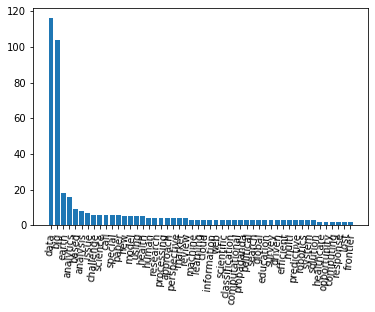

In [57]:
import matplotlib.pyplot as plt

sorted_Keys = sorted(word_count, key = word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = '85')
plt.show()


In [58]:
del word_count['big']
del word_count['data']

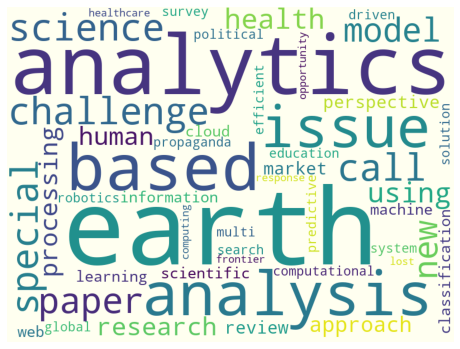

In [59]:
strpwords = set(STOPWORDS)
wc = WordCloud(background_color='ivory', stopwords=stopwords, width=800, height=600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()